# San Francisco Airbnb Price/Venue Analysis

This notebook will provide a framework and an explanation into the steps taken to analyse and compare San Francisco Airbnb, neighbourhood and venue data, and compare correlations and relationships between the data. 

The datasets used are from the following:

In [1]:
import pandas as pd
import numpy as np
import folium
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
from geopy.geocoders import Nominatim
import requests 
from pandas.io.json import json_normalize

There are almost 7000 total Airbnb listings in San Francisco County.

In [2]:
airbnb = pd.read_csv('listings.csv')
print(airbnb.shape)
airbnb.head()

(6998, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.76931,-122.43386,Entire home/apt,131,2,262,2020-09-16,1.92,1,206
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,2017-08-06,0.80,1,365
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,19,2020-03-06,0.14,9,365
3,8014,Newly Remodeled room in big house WIFI market,22402,Jia,NaN,Outer Mission,37.73075,-122.44841,Private room,45,5,85,2018-10-01,0.85,2,45
4,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,8,2018-09-12,0.11,9,365


Choosing the features and finding the average price per night.

In [3]:
bnb_df = airbnb[['neighbourhood', 'latitude', 'longitude', 'room_type', 'price']].copy()
bnbgrouped = bnb_df.groupby(['neighbourhood', 'room_type'], as_index=False).mean()
bnb_df = bnbgrouped
bnb_df['price']=bnb_df['price'].round()
bnb_df = bnb_df.rename(columns={'price':'average_price_per_night'})
print(bnb_df.shape)
bnb_df.head()

(103, 5)


,neighbourhood,room_type,latitude,longitude,average_price_per_night
0,Bayview,Entire home/apt,37.730401,-122.389999,184.0
1,Bayview,Private room,37.730532,-122.389392,68.0
2,Bayview,Shared room,37.736580,-122.384075,68.0
3,Bernal Heights,Entire home/apt,37.741641,-122.416309,218.0
4,Bernal Heights,Private room,37.741238,-122.416611,105.0


Find the average latitude, longitude and price of all Airbnbs in each neighbourhood.

In [4]:
bnbgrouped = bnb_df.groupby(['neighbourhood'], as_index=False).mean()
neighbourhood = bnbgrouped
neighbourhood.head()

,neighbourhood,latitude,longitude,average_price_per_night
0,Bayview,37.732504,-122.387822,106.666667
1,Bernal Heights,37.743453,-122.413710,130.666667
2,Castro/Upper Market,37.762923,-122.434719,159.666667
3,Chinatown,37.792201,-122.406616,361.000000
4,Crocker Amazon,37.710211,-122.444787,80.000000


Average price per night for an entire home/apt.

In [5]:
home = bnb_df.loc[bnb_df['room_type']=='Entire home/apt']
home.drop(['latitude', 'longitude'], axis=1, inplace=True)
home.rename(columns={'average_price_per_night':'average_price_per_night1'}, inplace=True)
home.head()

/Users/jaydenclark/Desktop/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/jaydenclark/Desktop/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,neighbourhood,room_type,average_price_per_night1
0,Bayview,Entire home/apt,184.0
3,Bernal Heights,Entire home/apt,218.0
6,Castro/Upper Market,Entire home/apt,291.0
9,Chinatown,Entire home/apt,1063.0
13,Crocker Amazon,Entire home/apt,145.0


Average price per night for a private room.

In [6]:
private = bnb_df.loc[bnb_df['room_type']=='Private room']
private.drop(['latitude', 'longitude'], axis=1, inplace=True)
private.rename(columns={'average_price_per_night':'average_price_per_night2'}, inplace=True)
private.head()

/Users/jaydenclark/Desktop/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/jaydenclark/Desktop/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,neighbourhood,room_type,average_price_per_night2
1,Bayview,Private room,68.0
4,Bernal Heights,Private room,105.0
7,Castro/Upper Market,Private room,128.0
11,Chinatown,Private room,226.0
14,Crocker Amazon,Private room,71.0


Average price per night for a shared room.

In [7]:
shared = bnb_df.loc[bnb_df['room_type']=='Shared room']
shared.drop(['latitude', 'longitude'], axis=1, inplace=True)
shared.rename(columns={'average_price_per_night':'average_price_per_night3'}, inplace=True)
shared.head()

/Users/jaydenclark/Desktop/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/jaydenclark/Desktop/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,neighbourhood,room_type,average_price_per_night3
2,Bayview,Shared room,68.0
5,Bernal Heights,Shared room,69.0
8,Castro/Upper Market,Shared room,60.0
12,Chinatown,Shared room,30.0
15,Crocker Amazon,Shared room,24.0


Find the coordinates of San Francisco and create a map with the coordinates of each neighbourhood from the dataframe above.

In [8]:
address = 'San Francisco, CA'

geolocator = Nominatim(user_agent="sf_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco are 37.7790262, -122.4199061.


In [9]:
map_sf = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(neighbourhood['latitude'], neighbourhood['longitude'], neighbourhood['neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sf)  
    
map_sf

Obtain nearby venues in each neighbourhood via Foursquare.

In [54]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = ''
VERSION = '20180604'
LIMIT = 200
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)  
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
sf_venues = getNearbyVenues(names=neighbourhood['neighbourhood'],
                                   latitudes=neighbourhood['latitude'],
                                   longitudes=neighbourhood['longitude']
                                  )

Bayview
Bernal Heights
Castro/Upper Market
Chinatown
Crocker Amazon
Diamond Heights
Downtown/Civic Center
Excelsior
Financial District
Glen Park
Golden Gate Park
Haight Ashbury
Inner Richmond
Inner Sunset
Lakeshore
Marina
Mission
Nob Hill
Noe Valley
North Beach
Ocean View
Outer Mission
Outer Richmond
Outer Sunset
Pacific Heights
Parkside
Potrero Hill
Presidio
Presidio Heights
Russian Hill
Seacliff
South of Market
Twin Peaks
Visitacion Valley
West of Twin Peaks
Western Addition


Further data cleaning of the venue dataframe. Changing spelling of 'Neighbourhood' to match previous dataframes used.

In [13]:
sf_venues = sf_venues.rename(columns = {"Neighborhood":"Neighbourhood", "Neighborhood Latitude":"Neighbourhood Latitude", "Neighborhood Longitude":"Neighbourhood Longitude"})
print(sf_venues.shape)
sf_venues.head(20)

(1561, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bayview,37.732504,-122.387822,Radio Africa & Kitchen,37.734826,-122.390764,African Restaurant
1,Bayview,37.732504,-122.387822,TATO,37.736315,-122.390498,Mexican Restaurant
2,Bayview,37.732504,-122.387822,Old Skool Cafe,37.734287,-122.390462,Southern / Soul Food Restaurant
3,Bayview,37.732504,-122.387822,Bayview Hunters Point YMCA,37.731851,-122.389733,Gym
4,Bayview,37.732504,-122.387822,Bayview Opera House Ruth Williams Memorial The...,37.735122,-122.390099,Theater
5,Bayview,37.732504,-122.387822,JJ Fish & Chicken,37.732321,-122.391808,Southern / Soul Food Restaurant
6,Bayview,37.732504,-122.387822,Krispy Krunchy Chicken,37.736744,-122.389678,Fried Chicken Joint
7,Bayview,37.732504,-122.387822,Frisco Fried,37.731064,-122.392089,Southern / Soul Food Restaurant
8,Bayview,37.732504,-122.387822,Auntie April's Chicken & Waffles,37.736115,-122.390467,Southern / Soul Food Restaurant
9,Bayview,37.732504,-122.387822,RoadHouse Coffee Co,37.730917,-122.392005,Café


Count and plot the number of venues in each neighbourhood.

In [14]:
num_sf_venues = sf_venues['Neighbourhood'].value_counts().to_frame()
num_sf_venues.index.rename('Neighbourhood', inplace=True)
num_sf_venues.rename(columns = {'Neighbourhood':'Count'}, inplace=True)
num_sf_venues.sort_values(by='Count', ascending=True, axis=0, inplace=True)
num_sf_venues.head()

,Count
Neighbourhood,
Visitacion Valley,3
Lakeshore,3
Ocean View,5
West of Twin Peaks,5
Excelsior,6


Text(0.5, 0, 'Neighbourhood')

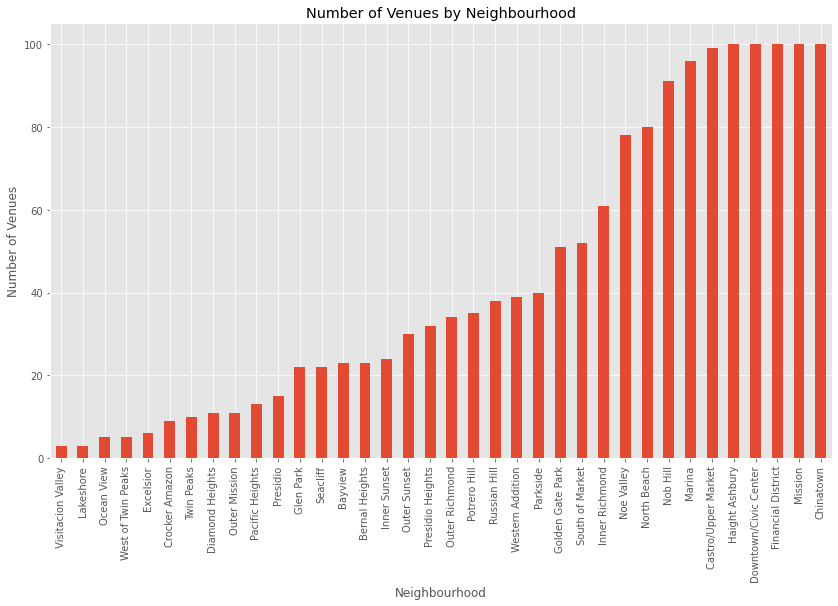

In [15]:
num_sf_venues.plot(kind='bar', figsize=(14, 8), legend=False)

plt.title('Number of Venues by Neighbourhood')
plt.ylabel('Number of Venues')
plt.xlabel('Neighbourhood')

We can see from the dataframe and line graph below that the correlation is positive but not too strong at 0.40117.

In [16]:
temp_df = neighbourhood[['neighbourhood','average_price_per_night']]
num_sf_venues_price = num_sf_venues.merge(temp_df, left_on='Neighbourhood', right_on='neighbourhood', how='inner')
num_sf_venues_price.set_index('neighbourhood', inplace=True)

print(num_sf_venues_price.shape)
num_sf_venues_price.head()

(36, 2)


,Count,average_price_per_night
neighbourhood,,
Visitacion Valley,3,126.0
Lakeshore,3,127.0
Ocean View,5,104.0
West of Twin Peaks,5,170.5
Excelsior,6,116.0


In [17]:
num_sf_venues_price.corr()

,Count,average_price_per_night
Count,1.000000,0.401907
average_price_per_night,0.401907,1.000000


Text(0.5, 0, 'Venue Count')

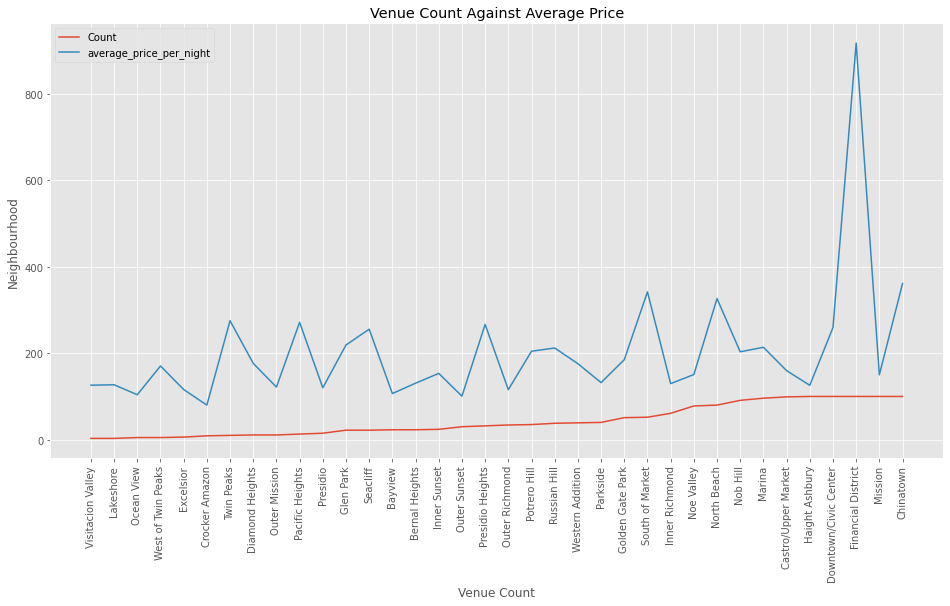

In [18]:
num_sf_venues_price.plot(kind='line', figsize=(16, 8))

plt.xticks(np.arange(36), list(num_sf_venues_price.index), rotation=90)
plt.title('Venue Count Against Average Price')
plt.ylabel('Neighbourhood')
plt.xlabel('Venue Count')

Prepare the room_type average prices for correlation analysis and plotting. It's also important to note that the correlation comparison will be taken using neighbourhoods that have all 3 types of Airbnb room_type listings.

In [19]:
temp1 = num_sf_venues.merge(home, left_on='Neighbourhood', right_on='neighbourhood', how='inner')
temp2 = temp1.merge(private, left_on='neighbourhood', right_on='neighbourhood', how='inner')
prices_seperated = temp2.merge(shared, left_on='neighbourhood', right_on='neighbourhood', how='inner')
prices_seperated.set_index('neighbourhood', inplace=True)
prices_seperated.rename(columns={'average_price_per_night1':'Entire home/apt', 'average_price_per_night2':'Private room', 'average_price_per_night3':'Shared room'}, inplace=True)
print(prices_seperated.shape)
prices_seperated.head()

(21, 7)


,Count,room_type_x,Entire home/apt,room_type_y,Private room,room_type,Shared room
neighbourhood,,,,,,,
Ocean View,5,Entire home/apt,171.0,Private room,80.0,Shared room,61.0
Crocker Amazon,9,Entire home/apt,145.0,Private room,71.0,Shared room,24.0
Outer Mission,11,Entire home/apt,219.0,Private room,110.0,Shared room,36.0
Bayview,23,Entire home/apt,184.0,Private room,68.0,Shared room,68.0
Bernal Heights,23,Entire home/apt,218.0,Private room,105.0,Shared room,69.0


Entire home/apt share similar positive correlations to the overall average Airbnb price per neighbourhood, whereas the shared room has close to no correlation at all with the number of venues per neighbourhood.

In [20]:
prices_seperated.corr()

,Count,Entire home/apt,Private room,Shared room
Count,1.000000,0.451686,0.349983,-0.000990
Entire home/apt,0.451686,1.000000,0.907974,-0.109420
Private room,0.349983,0.907974,1.000000,-0.045215
Shared room,-0.000990,-0.109420,-0.045215,1.000000


Text(0.5, 0, 'Venue Count')

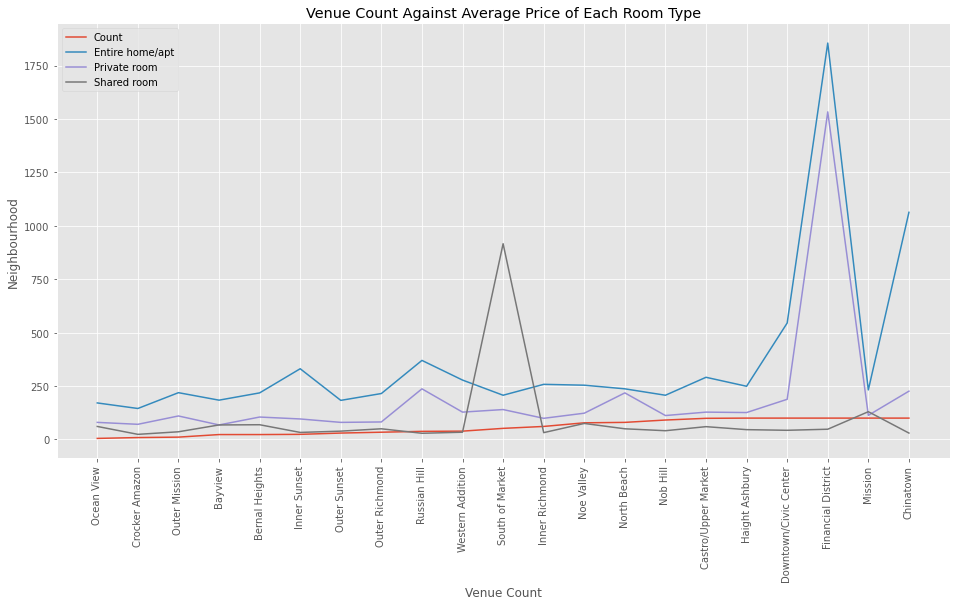

In [21]:
prices_seperated.plot(kind='line', figsize=(16, 8))

plt.xticks(np.arange(21), list(prices_seperated.index), rotation=90)
plt.title('Venue Count Against Average Price of Each Room Type')
plt.ylabel('Neighbourhood')
plt.xlabel('Venue Count')

Onehot encode and average the venues as to prepare the data for clustering and further analysis.

In [22]:
sf_onehot = pd.get_dummies(sf_venues[['Venue Category']], prefix="", prefix_sep="")

sf_onehot['Neighbourhood'] = sf_venues['Neighbourhood'] 

fixed_columns = [sf_onehot.columns[-1]] + list(sf_onehot.columns[:-1])
sf_onehot = sf_onehot[fixed_columns]

print(sf_onehot.shape)
sf_onehot.head()

(1561, 265)


,Neighbourhood,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Video Store,Vietnamese Restaurant,Wagashi Place,Watch Shop,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Bayview,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bayview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bayview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bayview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bayview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
sf_grouped = sf_onehot.groupby('Neighbourhood').mean().reset_index()
print(sf_grouped.shape)
sf_grouped.head()

(36, 265)


,Neighbourhood,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Video Store,Vietnamese Restaurant,Wagashi Place,Watch Shop,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Bayview,0.0,0.000000,0.043478,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,Bernal Heights,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,Castro/Upper Market,0.0,0.010101,0.000000,0.0,0.010101,0.0,0.0,0.010101,0.0,...,0.0,0.00,0.0,0.0,0.020202,0.0,0.0,0.0,0.0,0.010101
3,Chinatown,0.0,0.000000,0.000000,0.0,0.010000,0.0,0.0,0.000000,0.0,...,0.0,0.01,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.010000
4,Crocker Amazon,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


Find the 10 most common venues in each neighbourhood (some have less than 10 so in that case, they will be ordered appropriately).

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = sf_grouped['Neighbourhood']

for ind in np.arange(sf_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sf_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bayview,Southern / Soul Food Restaurant,Light Rail Station,Park,Theater,Dumpling Restaurant
1,Bernal Heights,Park,Playground,New American Restaurant,Grocery Store,Scenic Lookout
2,Castro/Upper Market,Gay Bar,Coffee Shop,Thai Restaurant,New American Restaurant,Park
3,Chinatown,Coffee Shop,Bakery,Hotel,Sushi Restaurant,Dim Sum Restaurant
4,Crocker Amazon,Deli / Bodega,Latin American Restaurant,Liquor Store,Fast Food Restaurant,Motel


Analyse the highest performing categories.

In [26]:
first_most_common = neighborhoods_venues_sorted['1st Most Common Venue'].value_counts().to_frame()
first_most_common.index.rename('1st Most Common Venue', inplace=True)
first_most_common.rename(columns = {'1st Most Common Venue':'Count'}, inplace=True)

first_most_common.head()

,Count
1st Most Common Venue,
Coffee Shop,6
Park,3
Trail,2
Playground,2
Scenic Lookout,2


Text(0.5, 0, 'Venue')

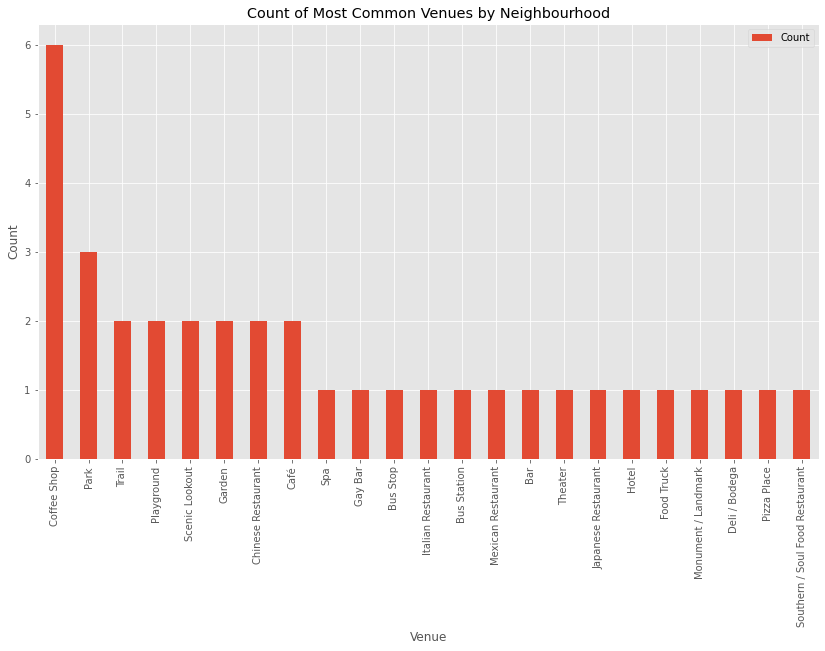

In [27]:
first_most_common.plot(kind='bar', figsize=(14, 8))

plt.title('Count of Most Common Venues by Neighbourhood')
plt.ylabel('Count')
plt.xlabel('Venue')

Use the elbow method for optimal k.

In [29]:
sf_grouped_clustering = sf_grouped.drop('Neighbourhood', 1)

distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(sf_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

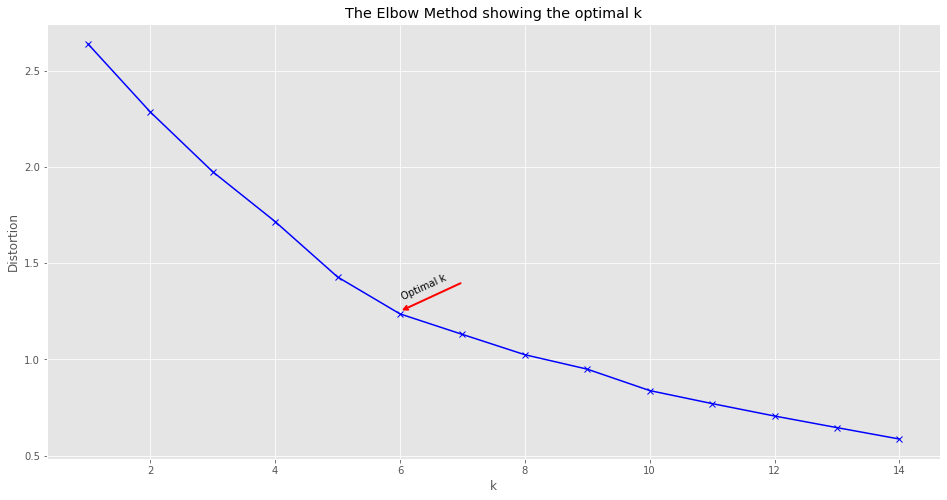

In [53]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.annotate('',                      
             xy=(6, 1.25),             
             xytext=(7, 1.4),         
             xycoords='data',         
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
            )

plt.annotate('Optimal k', 
             xy=(6, 1.3),                    
             rotation=24.5,                  
             va='bottom',                    
             ha='left',                      
            )

plt.show()

For this analysis, k=6 is used and the dataframe with the cluster labels is displayed below.

In [31]:
kclusters=6
kmean = KMeans(n_clusters=kclusters, random_state=0).fit(sf_grouped_clustering)
kmean.labels_[0:10]

kmean.labels_

array([1, 5, 1, 1, 1, 5, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 5, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 3, 1], dtype=int32)

In [32]:
neighborhoods_venues_sorted.insert(0, 'Cluster Numbers', kmean.labels_)

sf_merged = neighbourhood
sf_merged = sf_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='neighbourhood')
sf_merged.head()

,neighbourhood,latitude,longitude,average_price_per_night,Cluster Numbers,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bayview,37.732504,-122.387822,106.666667,1,Southern / Soul Food Restaurant,Light Rail Station,Park,Theater,Dumpling Restaurant
1,Bernal Heights,37.743453,-122.413710,130.666667,5,Park,Playground,New American Restaurant,Grocery Store,Scenic Lookout
2,Castro/Upper Market,37.762923,-122.434719,159.666667,1,Gay Bar,Coffee Shop,Thai Restaurant,New American Restaurant,Park
3,Chinatown,37.792201,-122.406616,361.000000,1,Coffee Shop,Bakery,Hotel,Sushi Restaurant,Dim Sum Restaurant
4,Crocker Amazon,37.710211,-122.444787,80.000000,1,Deli / Bodega,Latin American Restaurant,Liquor Store,Fast Food Restaurant,Motel


Print out each cluster for analysis and to determine the most appropriate name of each cluster.

In [33]:
sf_merged.loc[sf_merged['Cluster Numbers'] == 0, sf_merged.columns[[0] + list(range(5, sf_merged.shape[1]))]]

,neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
14,Lakeshore,Playground,Tennis Court,Performing Arts Venue,Yoga Studio,Food


In [34]:
sf_merged.loc[sf_merged['Cluster Numbers'] == 1, sf_merged.columns[[0] + list(range(5, sf_merged.shape[1]))]]

,neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bayview,Southern / Soul Food Restaurant,Light Rail Station,Park,Theater,Dumpling Restaurant
2,Castro/Upper Market,Gay Bar,Coffee Shop,Thai Restaurant,New American Restaurant,Park
3,Chinatown,Coffee Shop,Bakery,Hotel,Sushi Restaurant,Dim Sum Restaurant
4,Crocker Amazon,Deli / Bodega,Latin American Restaurant,Liquor Store,Fast Food Restaurant,Motel
6,Downtown/Civic Center,Theater,Cocktail Bar,Coffee Shop,Thai Restaurant,Hotel
8,Financial District,Coffee Shop,Boutique,Japanese Restaurant,Sushi Restaurant,Hotel
9,Glen Park,Trail,Park,Coffee Shop,Italian Restaurant,Gift Shop
10,Golden Gate Park,Garden,Science Museum,Exhibit,Park,Tea Room
11,Haight Ashbury,Coffee Shop,Boutique,Café,Thrift / Vintage Store,Clothing Store
12,Inner Richmond,Japanese Restaurant,Bakery,Sushi Restaurant,Burmese Restaurant,Pizza Place


In [35]:
sf_merged.loc[sf_merged['Cluster Numbers'] == 2, sf_merged.columns[[0] + list(range(5, sf_merged.shape[1]))]]

,neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
32,Twin Peaks,Scenic Lookout,Trail,Bus Station,Reservoir,Hill


In [36]:
sf_merged.loc[sf_merged['Cluster Numbers'] == 3, sf_merged.columns[[0] + list(range(5, sf_merged.shape[1]))]]

,neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,Excelsior,Park,Trail,Lake,Food Truck,Yoga Studio
34,West of Twin Peaks,Monument / Landmark,Gun Range,Trail,Park,Bus Line


In [37]:
sf_merged.loc[sf_merged['Cluster Numbers'] == 4, sf_merged.columns[[0] + list(range(5, sf_merged.shape[1]))]]

,neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
33,Visitacion Valley,Garden,Music Venue,Park,Filipino Restaurant,Fish Market


In [38]:
sf_merged.loc[sf_merged['Cluster Numbers'] == 5, sf_merged.columns[[0] + list(range(5, sf_merged.shape[1]))]]

,neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Bernal Heights,Park,Playground,New American Restaurant,Grocery Store,Scenic Lookout
5,Diamond Heights,Playground,Salon / Barbershop,Dim Sum Restaurant,Grocery Store,Trail
20,Ocean View,Bus Station,Grocery Store,Playground,Mountain,Park


Adding the the final components to our dataframe in which to complete the maps and cluster labels. Each marker label has neighbourhood name, the top 3 most common venues in that neighbourhood and the amount of venues in that neighbourhood as to provide valuable information to a customer when selecting a particular neighbourhood.

In [39]:
#add names for the cluster labels
a = kmean.labels_
mapping = {0:'Leisure', 1:'Food and Drink', 2:'Trails and Hiking', 3:'Outdoor Leisure', 4:'Miscellaneous', 5:'Playgrounds and Essentials'}
a = [mapping[i] for i in a]
sf_merged.insert(4, 'Cluster Labels', a)

#Take the top 3 venue categories from each neighbourhood and create their own column
sf_merged['Top_3'] = sf_merged[sf_merged.columns[7:10]].apply(
    lambda x: ', '.join(x.dropna().astype(str)),
    axis=1)

#add the number of venues for each neighbourhood
sf_merged = sf_merged.merge(num_sf_venues, left_on='neighbourhood', right_on='Neighbourhood', how='inner')

sf_merged.head()

,neighbourhood,latitude,longitude,average_price_per_night,Cluster Labels,Cluster Numbers,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Top_3,Count
0,Bayview,37.732504,-122.387822,106.666667,Food and Drink,1,Southern / Soul Food Restaurant,Light Rail Station,Park,Theater,Dumpling Restaurant,"Light Rail Station, Park, Theater",23
1,Bernal Heights,37.743453,-122.413710,130.666667,Playgrounds and Essentials,5,Park,Playground,New American Restaurant,Grocery Store,Scenic Lookout,"Playground, New American Restaurant, Grocery S...",23
2,Castro/Upper Market,37.762923,-122.434719,159.666667,Food and Drink,1,Gay Bar,Coffee Shop,Thai Restaurant,New American Restaurant,Park,"Coffee Shop, Thai Restaurant, New American Res...",99
3,Chinatown,37.792201,-122.406616,361.000000,Food and Drink,1,Coffee Shop,Bakery,Hotel,Sushi Restaurant,Dim Sum Restaurant,"Bakery, Hotel, Sushi Restaurant",100
4,Crocker Amazon,37.710211,-122.444787,80.000000,Food and Drink,1,Deli / Bodega,Latin American Restaurant,Liquor Store,Fast Food Restaurant,Motel,"Latin American Restaurant, Liquor Store, Fast ...",9


In [40]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster, name, top, num in zip(sf_merged['latitude'], sf_merged['longitude'], 
                                                  sf_merged['neighbourhood'], sf_merged['Cluster Numbers'], 
                                                  sf_merged['Cluster Labels'], sf_merged['Top_3'], sf_merged['Count']):
    label = folium.Popup(str(poi) + '/\n' + str(name) + '/\n' + str(top) + '/\n' + str(num) + ' Venues', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Here is the same clustering over the top of a chloropleth map showing the average Airbnb price for each neighbourhood.

In [41]:
sf_geo = r'neighbourhoods.json'

sf_chloro = folium.Map(location=[latitude, longitude], zoom_start=11)

sf_chloro.choropleth(
    geo_data=sf_geo,
    data=sf_merged,
    columns=['neighbourhood', 'average_price_per_night'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Price Per Night with Clustering',
    reset=True
)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster, name, top, num in zip(sf_merged['latitude'], sf_merged['longitude'], 
                                                  sf_merged['neighbourhood'], sf_merged['Cluster Numbers'], 
                                                  sf_merged['Cluster Labels'], sf_merged['Top_3'], sf_merged['Count']):
    label = folium.Popup(str(poi) + '/\n' + str(name) + '/\n' + str(top) + '/\n' + str(num) + ' Venues', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(sf_chloro)

sf_chloro

/Users/jaydenclark/Desktop/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
